# Deep Learning: Ejercicios de mitad de curso
### Junio 2021

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def mse(target, prediction):
    return np.sum((target - prediction) ** 2) / target.size

#### 3. Deep Learning y Regularización

<p style='text-align: justify;'>
$a.$ Crear un dataset sintético con 10,000 muestras a partir de la siguiente expresión, donde N es una normal de media cero y desvío 0.2. Utilizar 80% de los datos para entrenamiento y 20% de los datos para testing.
<p>
    
<p style='text-align: center;'>
$\Large y = (x - 2)^2 + 3 + N$
<p>

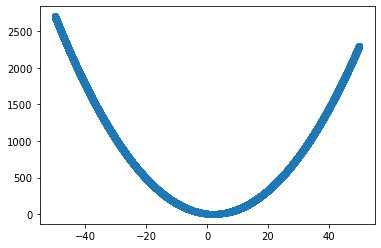

In [3]:
x = np.arange(-50, 50, 0.01)
N = np.random.normal(0, 0.2, 10000)
y = (x-2)**2+3+N
fig, ax = plt.subplots(1,1)
ax.scatter(x, y)

In [4]:
x_train = np.zeros((int(0.8 *len(x)),3))
x_test = np.zeros((int(0.2*len(x)),3))

print(x_train.shape)
print(x_test.shape)

(8000, 3)
(2000, 3)


In [5]:
idx = np.random.permutation(np.arange(0, 10000))

x_train[:,0] = x_train[:,0] + 1
x_test[:,0] = x_test[:,0] + 1

x_train[:,1] = x[idx[0:int(0.8*10000)]]
x_test[:,1] = x[idx[int(0.8*10000):]]

x_train[:,2] = x[idx[0:int(0.8*10000)]]**2
x_test[:,2] = x[idx[int(0.8*10000):]]**2

N_train = N[idx[0:int(0.8*10000)]]
N_test = N[idx[int(0.8*10000):]]

y_train = (x_train[:,1] - 2)**2 + 3 + N_train
y_test = (x_test[:,1] - 2)**2 + 3 + N_test

In [6]:
x_train[0:5,:]

array([[ 1.0000000e+00,  2.5640000e+01,  6.5740960e+02],
       [ 1.0000000e+00, -4.9030000e+01,  2.4039409e+03],
       [ 1.0000000e+00,  1.4280000e+01,  2.0391840e+02],
       [ 1.0000000e+00,  2.2180000e+01,  4.9195240e+02],
       [ 1.0000000e+00,  1.8950000e+01,  3.5910250e+02]])

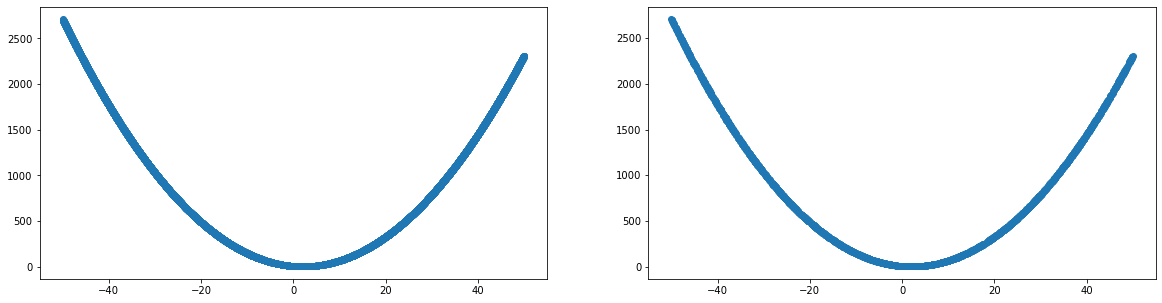

In [7]:
fig, ax = plt.subplots(1,2, figsize= (20,5))
ax[0].scatter(x_train[:,1], y_train)
ax[1].scatter(x_test[:,1], y_test)

In [8]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


<p style='text-align: justify;'>
$b.$ Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación.
    
Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?.
    
Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing
<p>
    
<p style='text-align: center;'>
$\Large \hat{y} = w_1 . x^{2} + w_2 . x + w_3$
<p>

<p style='text-align: justify;'>
La actualizacion de los pesos responden a la siguente expresión:
<p>
    
<p style='text-align: center;'>
$\Large \omega = \omega - \alpha * \bigtriangledown_\omega (\frac{1}{b} \sum \limits _{b} (J(\omega)))$
<p>
 
<p style='text-align: center;'>    
$\Large \omega = \omega - \alpha * \bigtriangledown_w (\frac{1}{b} \sum \limits _{b} (y-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))^2) $
<p>
    
<p style='text-align: center;'>      
$\Large \omega = \omega - \frac{\alpha}{b} * \sum \limits _{b} (-2)*(y-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))*\begin{bmatrix} \frac{\partial \hat y}{\partial \omega_1} \\ \frac{\partial \hat y}{\partial \omega_2} \\ \frac{\partial \hat y}{\partial \omega_3} \end{bmatrix} $
<p>
    
<p style='text-align: center;'>      
$\Large \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} - \frac{(-2) \alpha}{b} * \sum \limits _{b} (y-\hat y)*\begin{bmatrix} x^2 \\ x \\ 1 \end{bmatrix} $
<p>
    
<p style='text-align: justify;'>
Don de $b$ es el batch size.
<p>

In [33]:
def mini_batch_gradient_descent(x_train_mb, y_train_mb, x_test_mb, y_test_mb, lr = 0.01, epochs = 1000, batchs = 16):
    
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]
    
    # inicializo pesos de manero aleatoria
    w = np.random.randn(m).reshape(m, 1)

    mse_train = []
    mse_test = []
    
    for epoch in range(epochs):
        idx = np.random.permutation(x_train.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]
        
        batch_size = int(len(x_train_mb) / batchs)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1)
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

            w = w - (lr * gradient)
        
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))
        
    e = np.arange(epochs)+1
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_test, '-')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de validacion'])
    print(f"Error de entrenamiento final {mse_train[epoch]}")
    print(f"Error de testeo final {mse_test[epoch]}")
    return w, mse_train, mse_test

Error de entrenamiento final 20.58061041123798
Error de testeo final 21.199239621689088


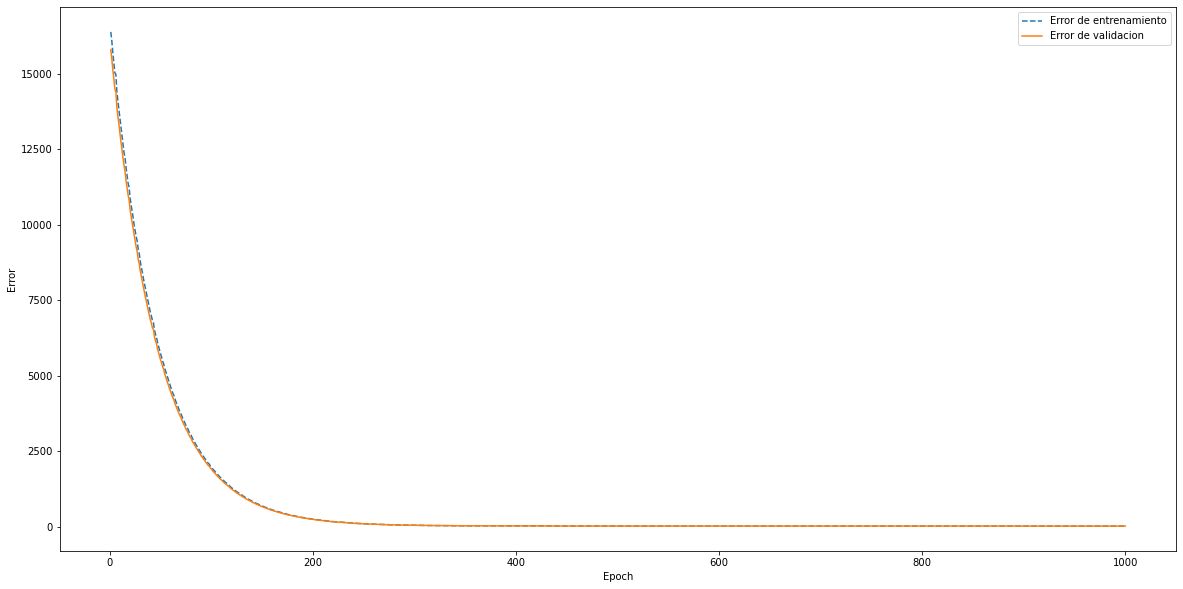

In [34]:
w, mse_train, mse_test = mini_batch_gradient_descent(x_train, y_train,
                                                     x_test, y_test, 
                                                     lr = 0.0000001, 
                                                     epochs = 1000, batchs = 64)

Tuve que modificar el arreglo de valores a x = np.arange(-50, 50, 0.01). Originalmente habia tomado valores x = np.arange(-5000, 5000) pero esto hacia que inicialmente tuviera mucho error de estimacion por lo que los pesos terminaban tomando valores fuera de rango.

In [11]:
print(f'Pesos finales {w}')

Pesos finales [[-0.64549426]
 [-3.99965075]
 [ 1.00505886]]


<p style='text-align: justify;'>
Desarrollando la funcion a estimar tenemos que:
<p>
    
<p style='text-align: center;'>
$\Large y = (x - 2)^2 + 3 + N = (x^2 -2 . 2. x + 2^2) + 3 + N = x^2 - 4x + (7 + N)$
<p>
    
<p style='text-align: justify;'>
Podemos ver que los pesos del termino de segundo y primer orden son muy similares.
<p>

**Probaremos con el dataset normalizado**

In [12]:
x_train_mean = x_train.mean(axis=0)
x_train_var = x_train.var(axis=0)

x_train_norm = x_train.copy()
x_train_norm [:,1:] = (x_train_norm[:,1:]-x_train_mean[1:])/x_train_var[1:]
x_train_norm[:5,:]

array([[ 1.00000000e+00,  3.05921125e-02, -3.25862752e-04],
       [ 1.00000000e+00, -5.83723546e-02,  2.80267309e-03],
       [ 1.00000000e+00,  1.70574085e-02, -1.13819487e-03],
       [ 1.00000000e+00,  2.64697467e-02, -6.22243802e-04],
       [ 1.00000000e+00,  2.26214110e-02, -8.60215875e-04]])

In [13]:
x_test_mean = x_test.mean(axis=0)
x_test_var = x_test.var(axis=0)

x_test_norm = x_test.copy()
x_test_norm [:,1:] = (x_test_norm[:,1:]-x_test_mean[1:])/x_test_var[1:]
x_test_norm[:5,:]

array([[ 1.00000000e+00,  2.97551954e-03, -1.47596660e-03],
       [ 1.00000000e+00,  5.63021910e-02,  2.34953639e-03],
       [ 1.00000000e+00,  3.36173511e-02, -1.14768336e-04],
       [ 1.00000000e+00,  4.19820769e-02,  6.49681669e-04],
       [ 1.00000000e+00, -5.34276906e-02,  1.92999491e-03]])

Error de entrenamiento final 443864.371705251
Error de testeo final 430675.11563903815


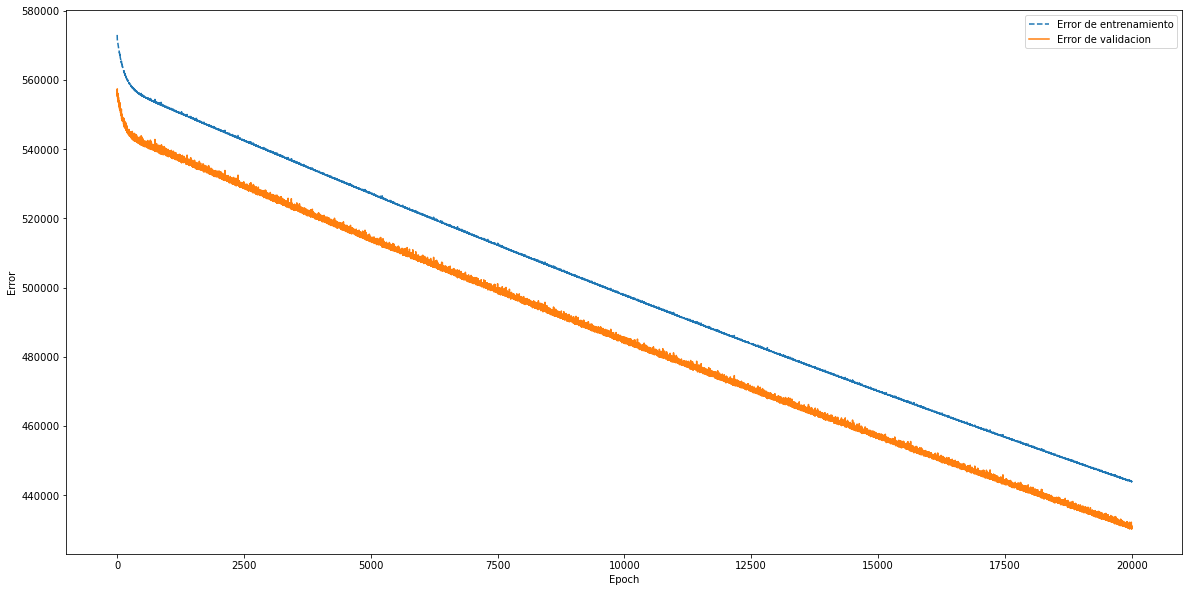

In [29]:
w_norm, mse_train_norm, mse_test_norm = mini_batch_gradient_descent(x_train_norm, y_train,
                                                                    x_test_norm, y_test, 
                                                                    lr = 0.1, 
                                                                    epochs = 20000, batchs = 32)

<p style='text-align: justify;'>
$c.$ Ahora se le agrega regularización l2 a la función de costo.
    
¿cómo cambia la regla de actualización de cada parámetro?
    
Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing.
    
Seleccionar manualmente los parámetros para el learning rate y para el coeficiente de regularización.
<p>
    

<p style='text-align: justify;'>
La actualizacion de los pesos en Mini-Batch Gradient Descent con regularizacion L2 responden a la siguente expresión:
<p>
    
<p style='text-align: center;'>
$\Large \omega = \omega - \alpha * \bigtriangledown_w (\frac{1}{b} \sum \limits _{b} (J(\omega)))$
<p>

<p style='text-align: justify;'>
Pero en este caso la función costo esta dada por:
<p>
    
<p style='text-align: center;'>
$\Large J(\omega) = \frac{1}{b} * [ \,\sum \limits _{b} (y_b - \hat y)^2 + \lambda * \| \omega \|^2  ]\,$
<p>
 
<p style='text-align: center;'>    
$\Large \omega = \omega - \frac{\alpha}{b} * \bigtriangledown_w [ \, \sum \limits _{b} (y_b-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))^2 + \lambda * \| \omega \|^2 ]\, $
<p>
    
<p style='text-align: center;'>      
$\Large \omega = \omega - \frac{\alpha}{b} * [ \, \sum \limits _{b} (-2)*(y_b-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))*x_b + 2* \omega * \lambda]\, $
<p>
    
<p style='text-align: center;'>      
$\Large \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} * (1 - \frac {\alpha * \lambda}{b}) - \frac{(-2) \alpha}{b} * \sum \limits _{b} (y_b-\hat y)*x_b $
<p>
    
<p style='text-align: justify;'>
Don de $b$ es el batch size.
<p>

In [64]:
def mbgd_r2(x_train_mb, y_train_mb, x_test_mb, y_test_mb, lr=0.01, epochs=100, lamb=0.1, b = 16):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]

    # initialize random weights
    w = np.random.randn(m).reshape(m, 1)
    
    mse_train = []
    mse_test = []
    for epoch in range(epochs):
        idx = np.random.permutation(x_train_mb.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]

        batch_size = int(len(x_train_mb) / b)
        c = 1 - ((lr*lamb)/batch_size)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1) #Con esta linea corrijo el error que tenia debido a las dimensiones de las matrices.
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
             
            w = w*c-lr*gradient
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))

    e = np.arange(epochs)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title(f'Parametros: LearningRate = {lr} - Regularizacion Lambda = {lamb}')
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_test, '-')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de test'])        
    return w, mse_train, mse_test

Parametros: epochs:500  regularizacion: 1e-5  lr: 0.0000001  batches = 64
Error de entrenamiento final 20.274582067250122
Error de testeo final 20.88261410321338
[[ 0.28052261]
 [-3.98263184]
 [ 1.00446198]]


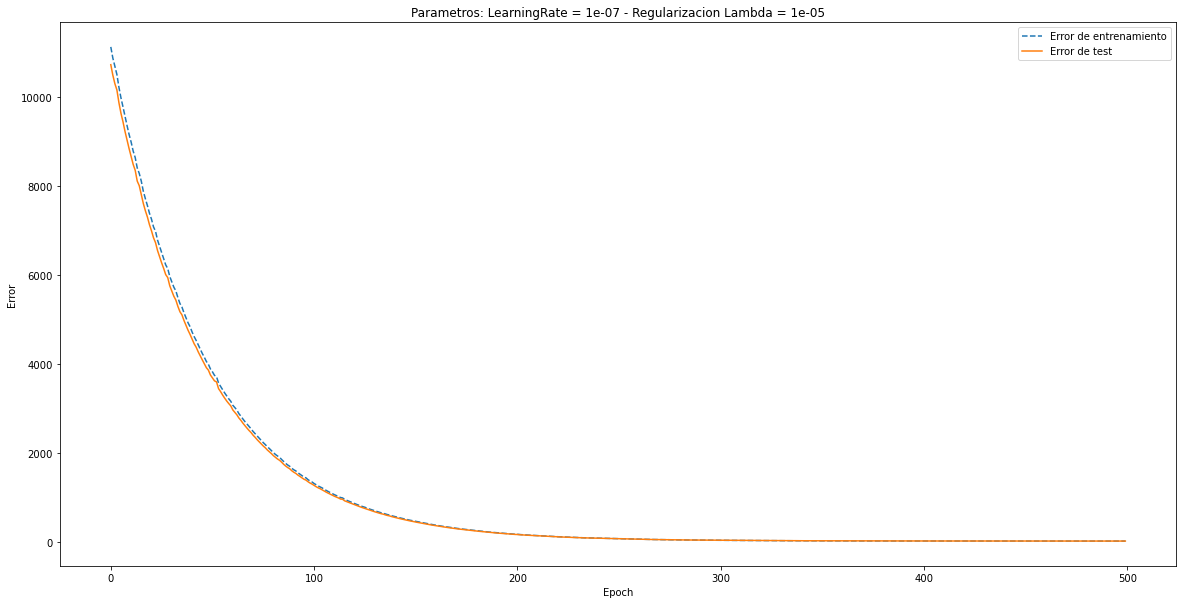

In [63]:
eph = 500
w_ridge, mse_train_ridge, mse_test_ridge = mbgd_r2(x_train, y_train,
                                                      x_test, y_test,
                                                      lr=0.0000001, epochs=eph, lamb = 1e-5, b = 64)

print(f"Parametros: epochs:{eph}  regularizacion: 1e-5  lr: 0.0000001  batches = 64")
print(f"Error de entrenamiento final {mse_train_ridge[eph-1]}")
print(f"Error de testeo final {mse_test_ridge[eph-1]}")
print(w_ridge)

<p style='text-align: justify;'>
$d.$ En lugar de seleccionar manualmente el learning rate y el coeficiente de regularización, utiliza el 10% del dataset de entrenamiento como dataset de validación. Hacer una búsqueda (grid search) de los hiper parámetros que mejor resultado te dan para el ECM sobre el dataset de validación.
    
Luego, utiliza los mejores hiper parámetros para reportar las métricas sobre el dataset de testing.
<p>

In [73]:
def mbgd_r2_v2(x_train_mb, y_train_mb, x_val_mb, y_val_mb, x_test_mb, y_test_mb, lr=0.01, epochs=100, lamb=0.1, b = 16):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]

    # initialize random weights
    w = np.random.randn(m).reshape(m, 1)
    
    mse_train = []
    mse_val = []
    mse_test = []
    for epoch in range(epochs):
        idx = np.random.permutation(x_train_mb.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]

        batch_size = int(len(x_train_mb) / b)
        c = 1 - ((lr*lamb)/batch_size)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1) #Con esta linea corrijo el error que tenia debido a las dimensiones de las matrices.
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
             
            w = w*c-lr*gradient
        
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_val.append(mse(y_val_mb.reshape(-1,1), np.matmul(x_val_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))

    e = np.arange(epochs)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title(f'Parametros: LearningRate = {lr} - Regularizacion Lambda = {lamb}')
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_val, '-')
    plt.plot(e, mse_test, 'o')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de validacion', 'Error de test'])        
    return w, mse_train, mse_val, mse_test

In [84]:
x_train_mbridge = np.zeros((int(0.7 *len(x)),3))
x_test_mbridge  = np.zeros((int(0.2*len(x)),3))
x_val_mbridge = np.zeros((int(0.1 *len(x)),3))

print(x_train_mbridge.shape)
print(x_test_mbridge.shape)
print(x_val_mbridge.shape)

(7000, 3)
(2000, 3)
(1000, 3)


In [85]:
idx = np.random.permutation(np.arange(0, 10000))

x_train_mbride[:,0] = x_train_mbride[:,0] + 1
x_test_mbride[:,0] = x_test_mbride[:,0] + 1
x_val_mbride[:,0] = x_val_mbride[:,0] + 1

x_train_mbride[:,1] = x[idx[0:int(0.7*10000)]]
x_test_mbride[:,1] = x[idx[int(0.7*10000):int(0.9*10000)]]
x_val_mbride[:,1] = x[idx[int(0.9*10000):]]

x_train_mbride[:,2] = x[idx[0:int(0.7*10000)]]**2
x_test_mbride[:,2] = x[idx[int(0.7*10000):int(0.9*10000)]]**2
x_val_mbride[:,2] = x[idx[int(0.9*10000):]]**2

N_train_mbridge = N[idx[0:int(0.7*10000)]]
N_test_mbridge = N[idx[int(0.7*10000):int(0.9*10000)]]
N_val_mbridge = N[idx[int(0.9*10000):]]

y_train_mbridge = (x_train_mbridge[:,1] - 2)**2 + 3 + N_train_mbridge
y_test_mbridge = (x_test_mbridge[:,1] - 2)**2 + 3 + N_test_mbridge
y_val_mbridge = (x_val_mbride[:,1] - 2)**2 + 3 + N_val_mbridge

Parametros: epochs:1000  regularizacion: 1e-15  lr: 1e-07  batches = 64
Error de entrenamiento final 112.49880200598645
Error de validacion final 1283726.3373801797
Error de testeo final 112.8264961591039
[[-1.77689574e+00]
 [-1.09015898e-03]
 [ 1.10366315e-02]]

Parametros: epochs:1000  regularizacion: 1e-14  lr: 1e-07  batches = 64
Error de entrenamiento final 21.400852303193453
Error de validacion final 1284787.7581177545
Error de testeo final 21.443019005802743
[[ 0.01477876]
 [-0.00043002]
 [ 0.00465385]]

Parametros: epochs:1000  regularizacion: 1e-13  lr: 1e-07  batches = 64
Error de entrenamiento final 22.23648616812123
Error de validacion final 1284857.770106312
Error de testeo final 22.276706545446523
[[-0.01209922]
 [-0.00045969]
 [ 0.00471556]]

Parametros: epochs:1000  regularizacion: 1e-13  lr: 1e-07  batches = 64
Error de entrenamiento final 12.134335631842376
Error de validacion final 1284736.8220163246
Error de testeo final 12.16138288908728
[[ 3.58086785e-01]
 [-2.891

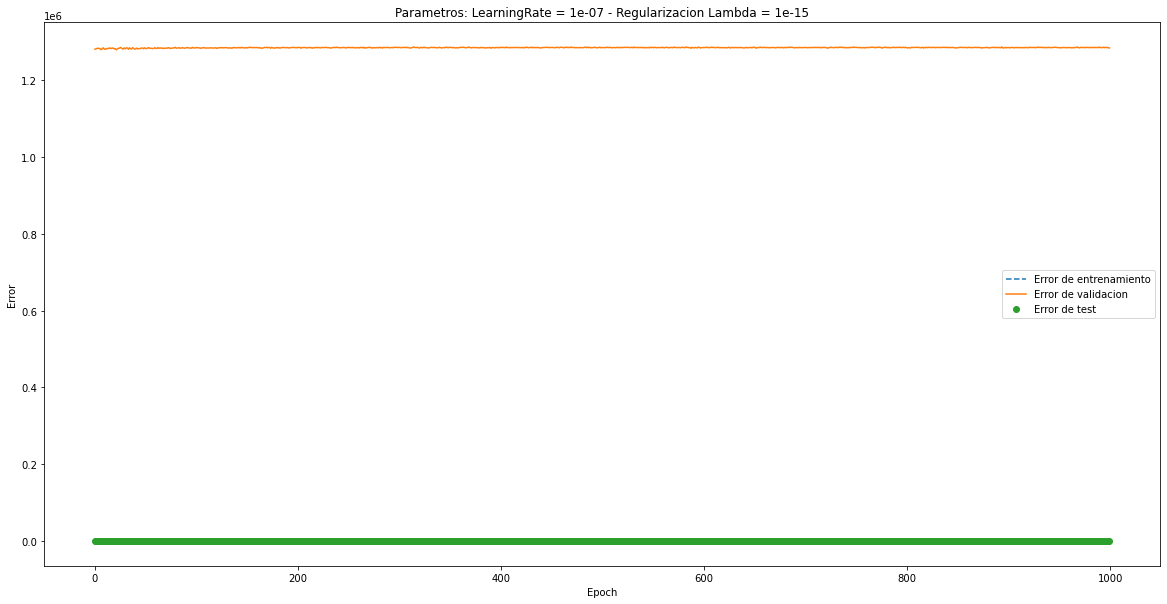

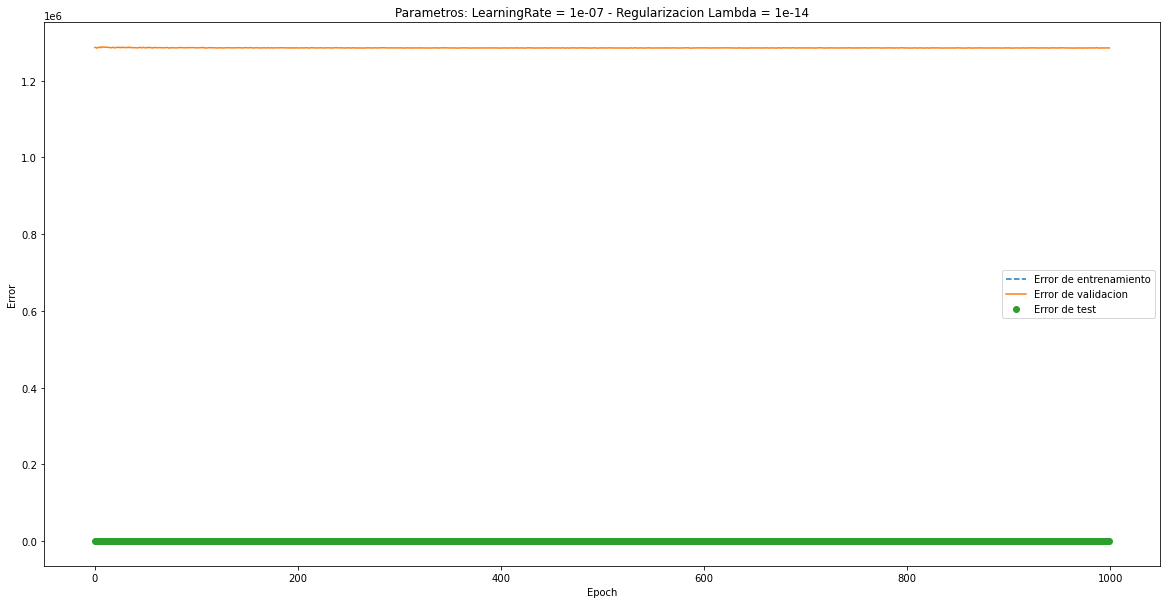

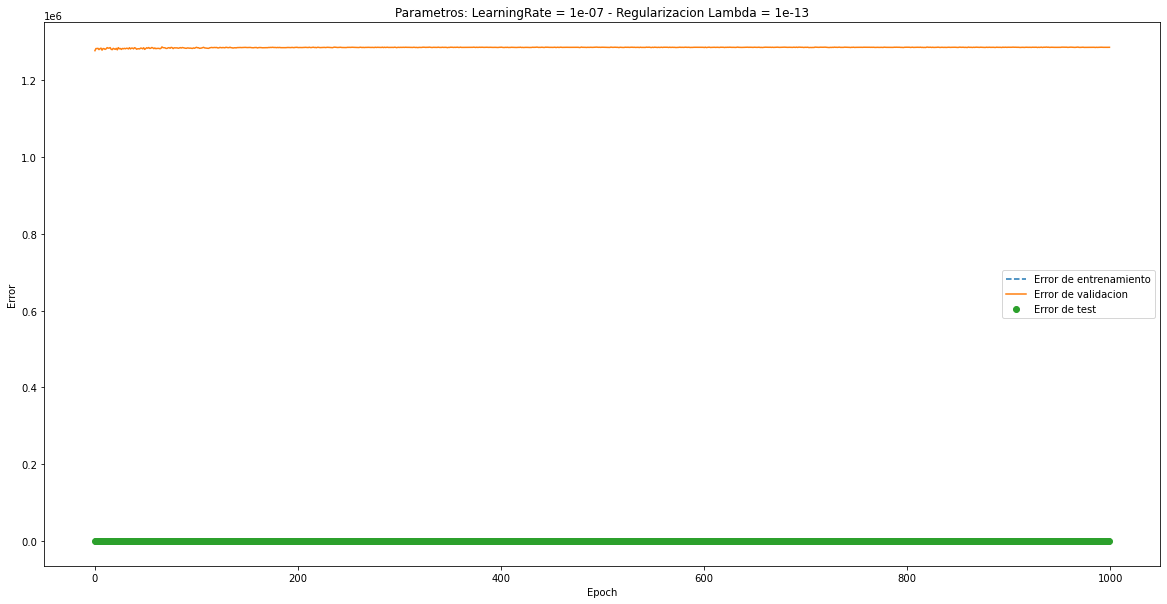

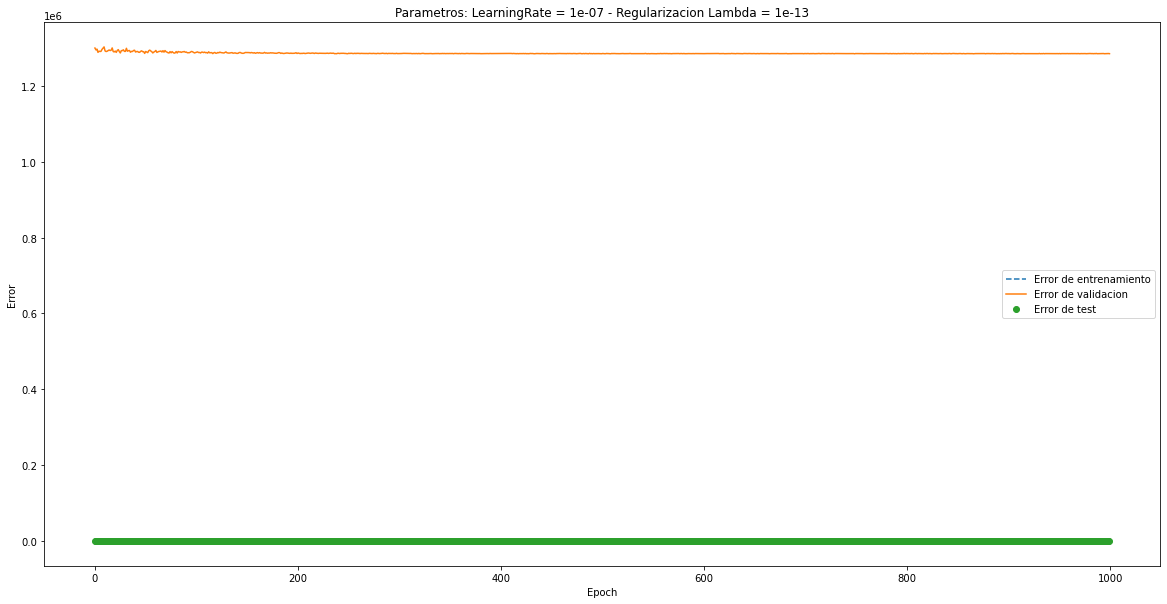

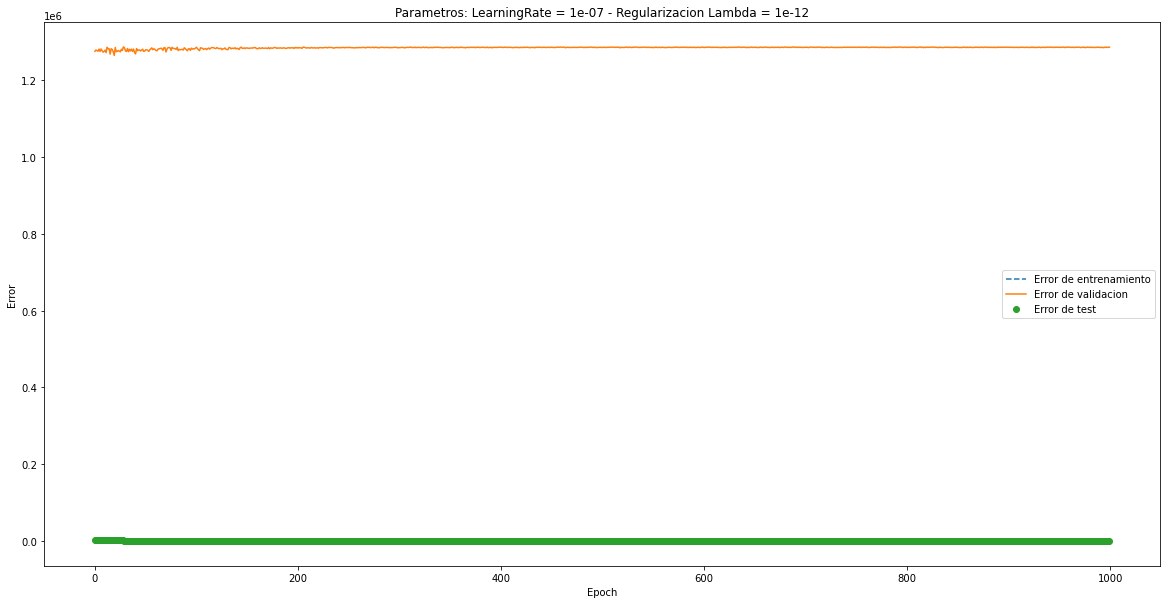

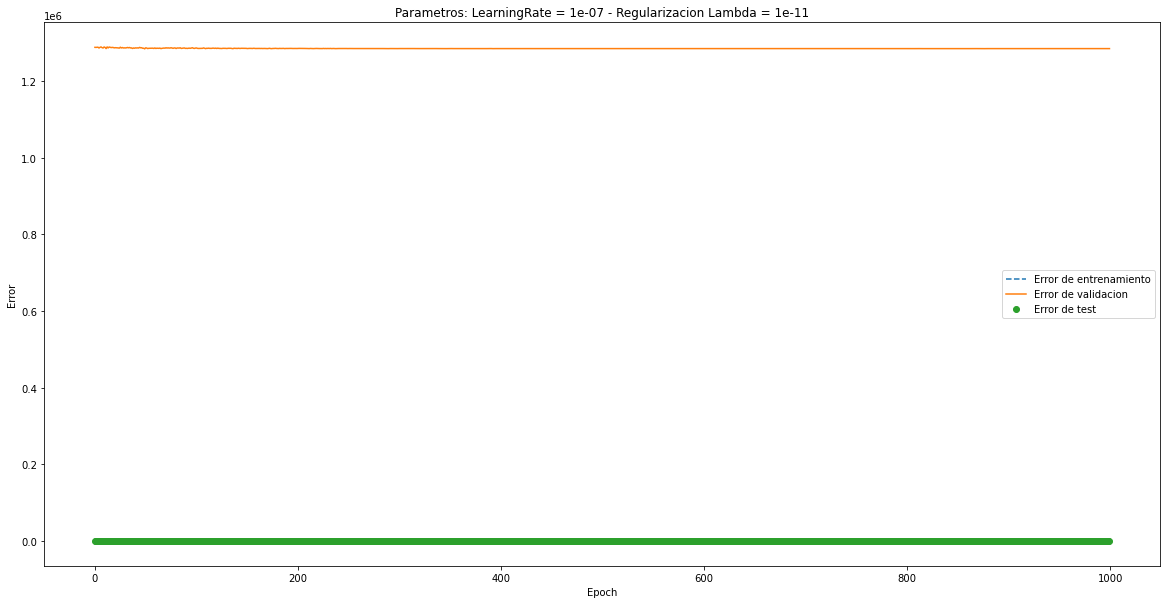

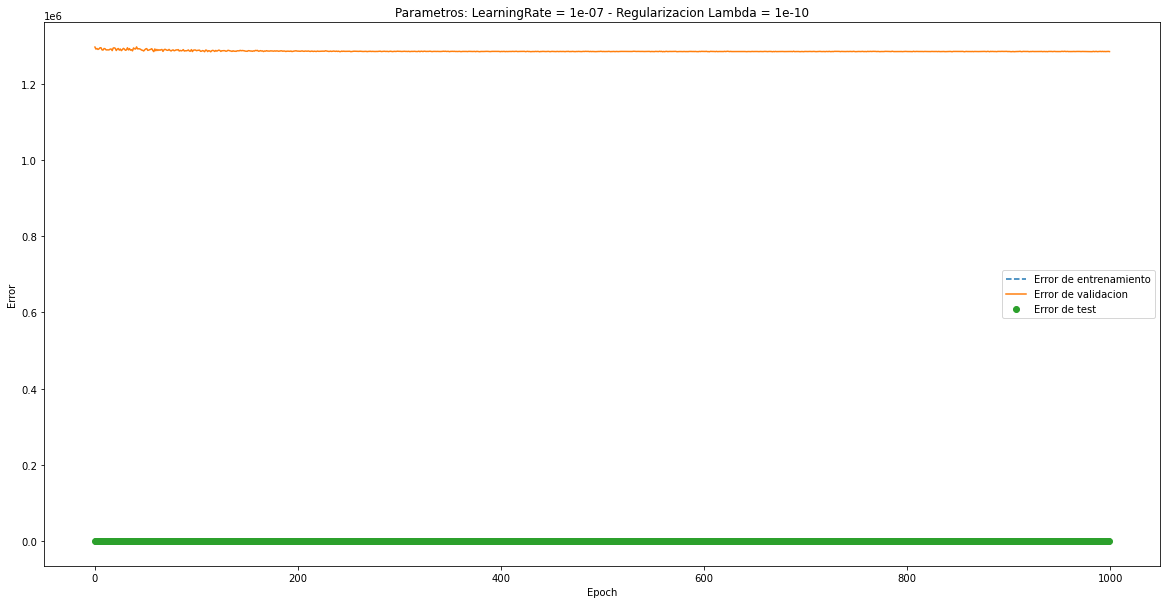

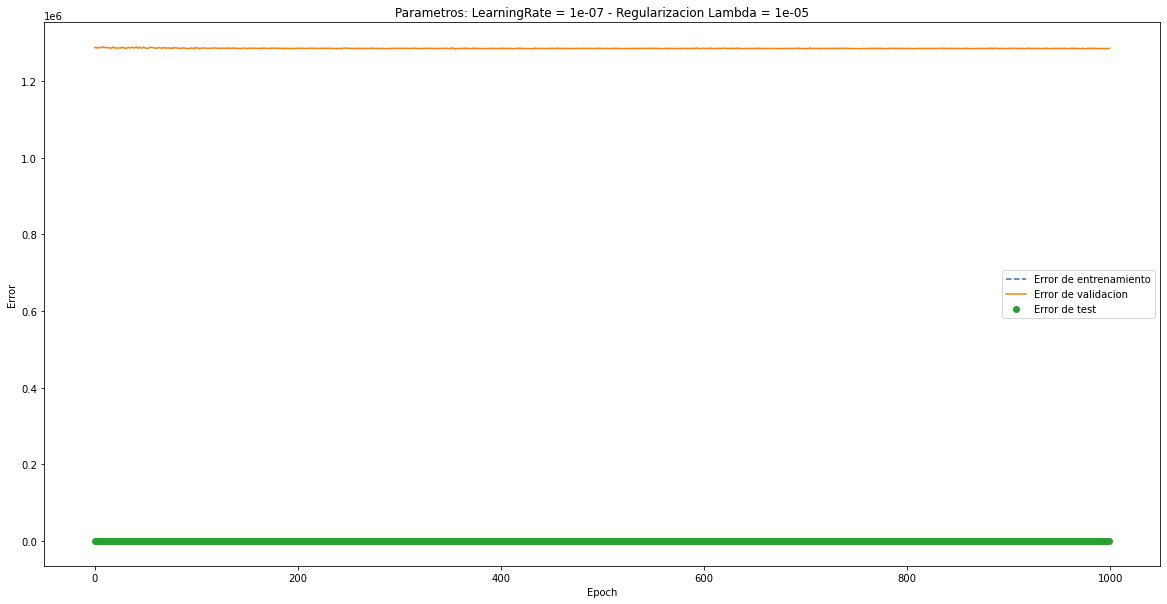

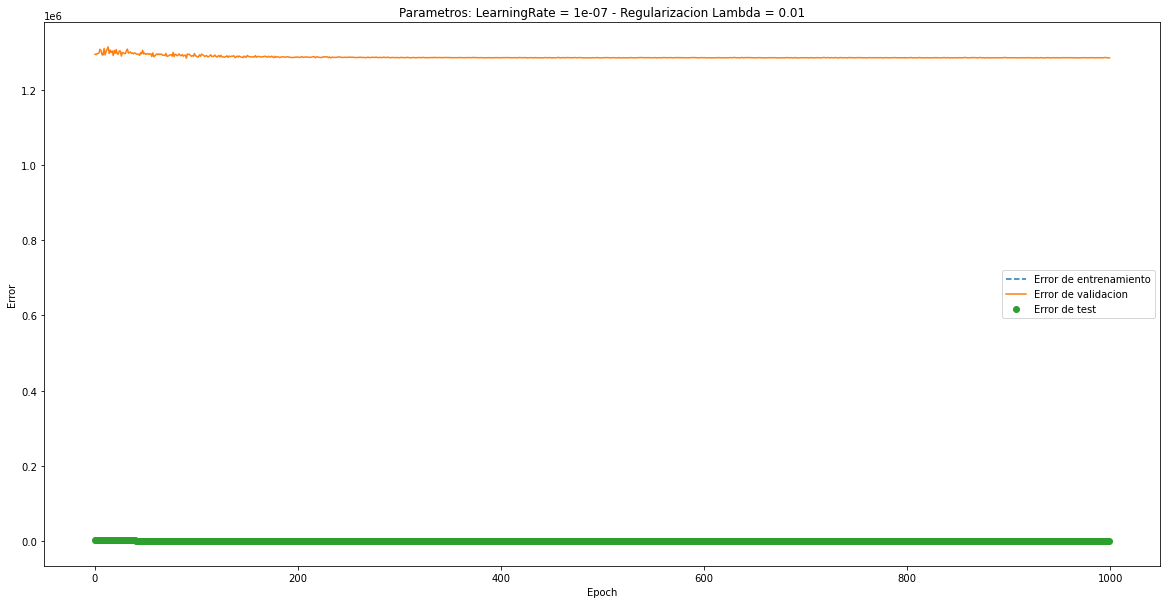

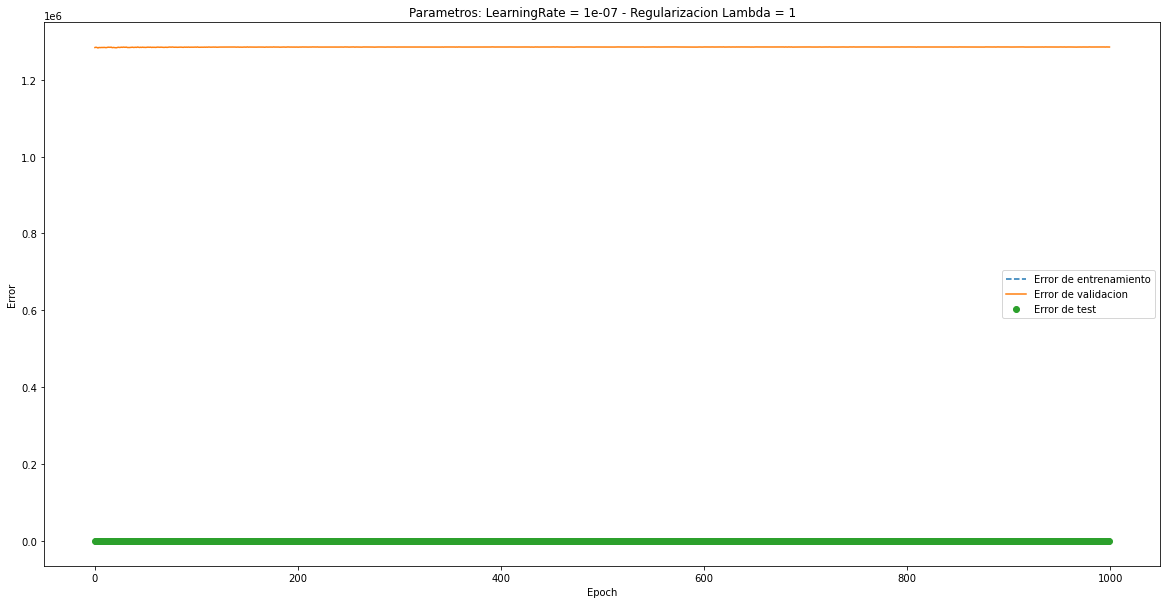

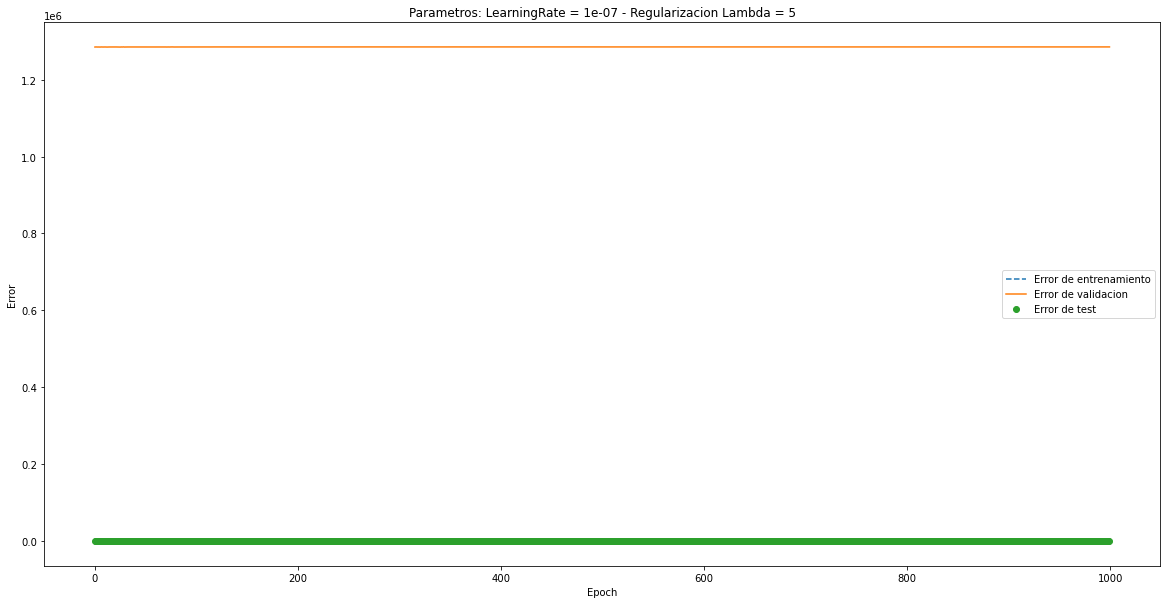

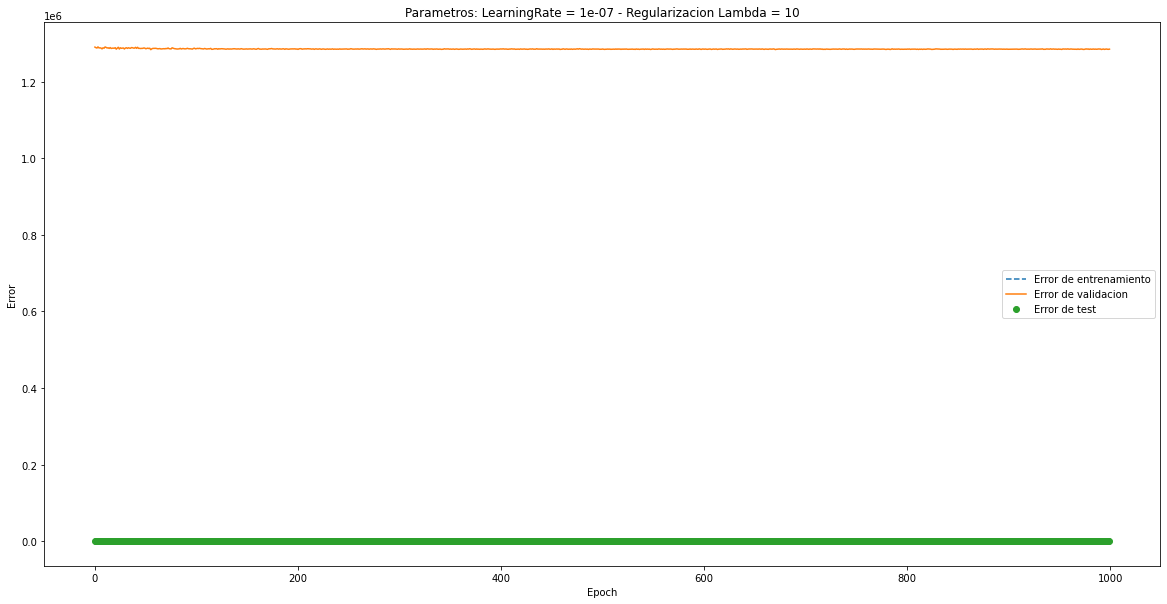

In [86]:
regularizacion = [1e-15,1e-14, 1e-13, 1e-13,1e-12, 1e-11, 1e-10, 1e-5, 1e-2, 1, 5, 10]
mse_lamb_test = []
mse_lamb_val = []
mse_lamb_train = []
eph2 = 1000

for lambd in regularizacion:

    w_ridge, mse_train_ridge, mse_val_ridge, mse_test_ridge = mbgd_r2_v2(x_train_mbride, y_train_mbridge,
                                                                      x_val_mbride, y_val_mbridge,
                                                                      x_test_mbride, y_test_mbridge, 
                                                                      lr=0.0000001, epochs=eph2, lamb = lambd, b = 64)
    print(f"Parametros: epochs:{eph2}  regularizacion: {lambd}  lr: {0.0000001}  batches = 64")
    print(f"Error de entrenamiento final {mse_train_ridge[eph2-1]}")
    print(f"Error de validacion final {mse_val_ridge[eph2-1]}")
    print(f"Error de testeo final {mse_test_ridge[eph2-1]}")
    print(w_ridge)
    print()
    mse_lamb_test.append(mse_test_ridge[eph2-1])
    mse_lamb_val.append(mse_val_ridge[eph2-1])
    mse_lamb_train.append(mse_train_ridge[eph2-1])

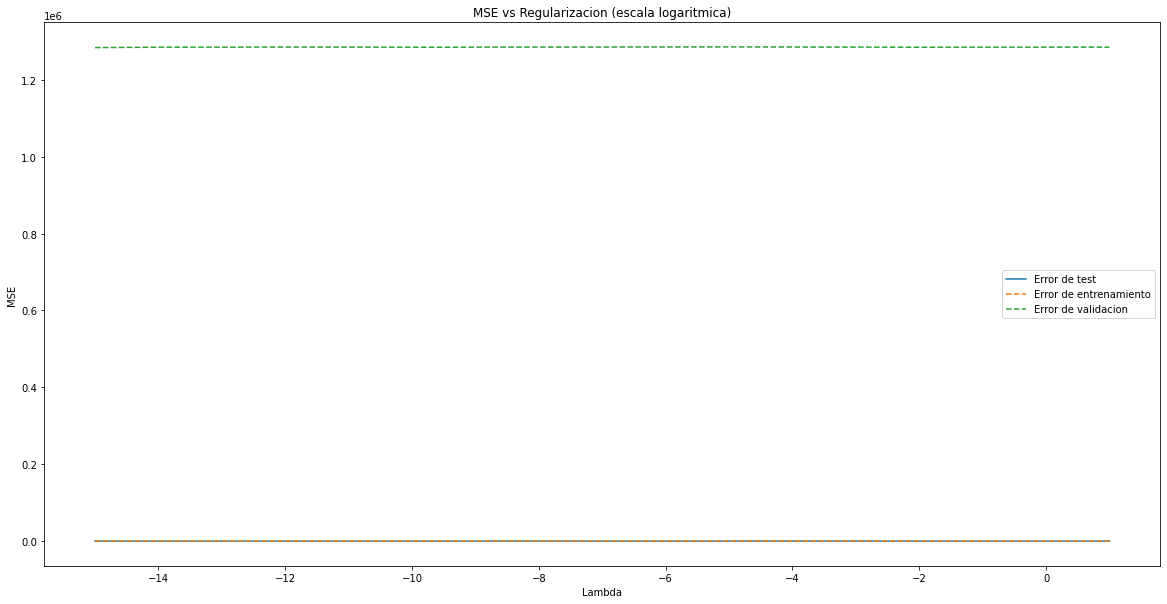

In [87]:
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title('MSE vs Regularizacion (escala logaritmica)')
    plt.plot(np.log10(regularizacion), mse_lamb_test, '-')
    plt.plot(np.log10(regularizacion), mse_lamb_train, '--')
    plt.plot(np.log10(regularizacion), mse_lamb_val, '--')
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.legend(['Error de test', 'Error de entrenamiento', 'Error de validacion']) 

**Comentario**: No encuentro el motivo por el cual tengo un gran error de validacion.

Si utilizo el error de testeo para encontrar el mejor parametro de regulacion:

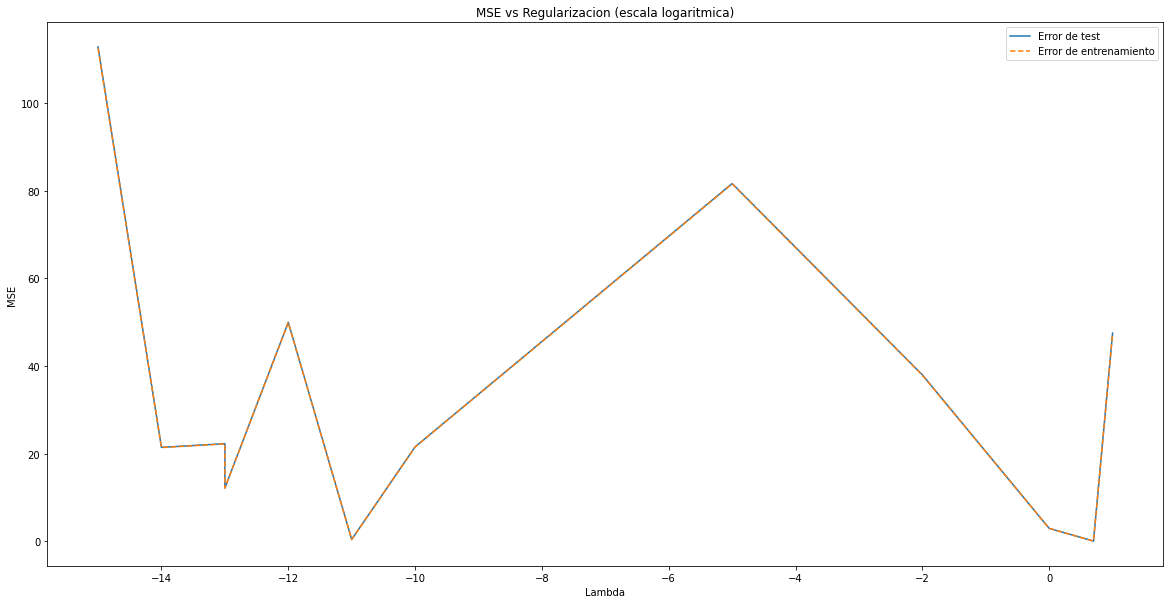

In [88]:
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title('MSE vs Regularizacion (escala logaritmica)')
    plt.plot(np.log10(regularizacion), mse_lamb_test, '-')
    plt.plot(np.log10(regularizacion), mse_lamb_train, '--')
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.legend(['Error de test', 'Error de entrenamiento']) 

**El mejor modelo se da para un lambda = 5**

Parametros: epochs:1000  regularizacion: 5  lr: 1e-07  batches = 64

Error de entrenamiento final 0.05070065580564594

Error de testeo final 0.04981712608677182

[[1.36980284e+00]
 [4.68026224e-05]
 [9.08421344e-05]]